In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import example
import formalisation

In [4]:
# Process the world.
# Note how no events were passed into the pipeline - the start point is inferred automatically.
example.w.process_with_callback(
    lambda w, r: w.reset_agents(),
    ignore_exceptions=True
)

# Draw the trace graph for this world.
example.w.draw_trace_graph()

# Example Graph

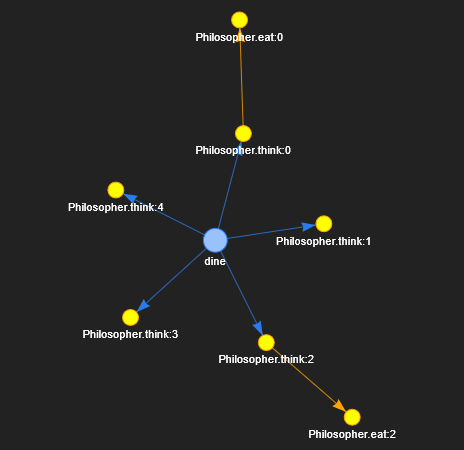

In [6]:
# Generate the FDL representation and visualize it for this world.
example.w.generate_flow_description()

['dine -> {Philosopher.think}',
 'Philosopher.think -> {Philosopher.eat}',
 'Philosopher.eat -> {}']

In [8]:
example.w.draw_flow_graph()

# Example Graph

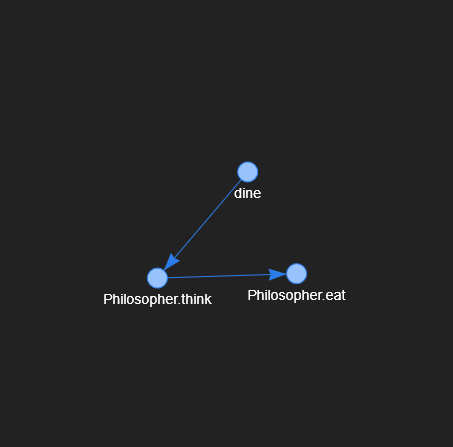

In [15]:
# We can also generate the visualization for arbitrary FDL descriptions.
formalisation.visualize_fdl([
    'foo -> {bar, baz}',
    'bar -> {bar}',
    'baz -> {foobaz, barbaz}'
])

# Example Graph

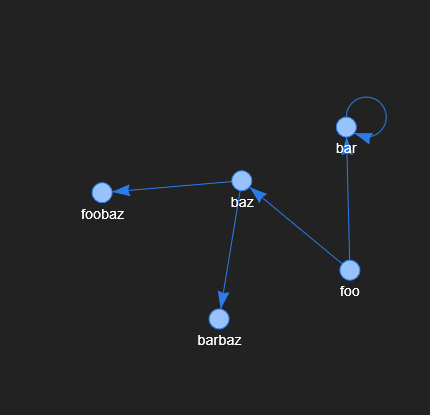